In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [16]:
df = pd.read_csv('NetflixMovie.csv', lineterminator='\n')
df.head()

,Release_Date,Title,Overview,Popularity,Vote_Count,Vote_Average,Original_Language,Genre,Poster_Url
0,2021-12-15,Spider-Man: No Way Home,Peter Parker is unmasked and no longer able to...,5083.954,8940,8.3,en,"Action, Adventure, Science Fiction",https://image.tmdb.org/t/p/original/1g0dhYtq4i...
1,2022-03-01,The Batman,"In his second year of fighting crime, Batman u...",3827.658,1151,8.1,en,"Crime, Mystery, Thriller",https://image.tmdb.org/t/p/original/74xTEgt7R3...
2,2022-02-25,No Exit,Stranded at a rest stop in the mountains durin...,2618.087,122,6.3,en,Thriller,https://image.tmdb.org/t/p/original/vDHsLnOWKl...
3,2021-11-24,Encanto,"The tale of an extraordinary family, the Madri...",2402.201,5076,7.7,en,"Animation, Comedy, Family, Fantasy",https://image.tmdb.org/t/p/original/4j0PNHkMr5...
4,2021-12-22,The King's Man,As a collection of history's worst tyrants and...,1895.511,1793,7.0,en,"Action, Adventure, Thriller, War",https://image.tmdb.org/t/p/original/aq4Pwv5Xeu...


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9827 entries, 0 to 9826
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Release_Date       9827 non-null   object 
 1   Title              9827 non-null   object 
 2   Overview           9827 non-null   object 
 3   Popularity         9827 non-null   float64
 4   Vote_Count         9827 non-null   int64  
 5   Vote_Average       9827 non-null   float64
 6   Original_Language  9827 non-null   object 
 7   Genre              9827 non-null   object 
 8   Poster_Url         9827 non-null   object 
dtypes: float64(2), int64(1), object(6)
memory usage: 691.1+ KB


In [18]:
df['Genre'].head()

,Genre
0,"Action, Adventure, Science Fiction"
1,"Crime, Mystery, Thriller"
2,Thriller
3,"Animation, Comedy, Family, Fantasy"
4,"Action, Adventure, Thriller, War"


In [19]:
df.duplicated().sum()

np.int64(0)

# **Statistics**

In [20]:
df.describe()

,Popularity,Vote_Count,Vote_Average
count,9827.000000,9827.000000,9827.000000
mean,40.326088,1392.805536,6.439534
std,108.873998,2611.206907,1.129759
min,13.354000,0.000000,0.000000
25%,16.128500,146.000000,5.900000
50%,21.199000,444.000000,6.500000
75%,35.191500,1376.000000,7.100000
max,5083.954000,31077.000000,10.000000


In [21]:
df['Release_Date'] = pd.to_datetime(df['Release_Date'])
print(df['Release_Date'].dtypes)

datetime64[ns]


In [22]:
df['Release_Date'] = df['Release_Date'].dt.year
df['Release_Date'].dtypes
df.head()

,Release_Date,Title,Overview,Popularity,Vote_Count,Vote_Average,Original_Language,Genre,Poster_Url
0,2021,Spider-Man: No Way Home,Peter Parker is unmasked and no longer able to...,5083.954,8940,8.3,en,"Action, Adventure, Science Fiction",https://image.tmdb.org/t/p/original/1g0dhYtq4i...
1,2022,The Batman,"In his second year of fighting crime, Batman u...",3827.658,1151,8.1,en,"Crime, Mystery, Thriller",https://image.tmdb.org/t/p/original/74xTEgt7R3...
2,2022,No Exit,Stranded at a rest stop in the mountains durin...,2618.087,122,6.3,en,Thriller,https://image.tmdb.org/t/p/original/vDHsLnOWKl...
3,2021,Encanto,"The tale of an extraordinary family, the Madri...",2402.201,5076,7.7,en,"Animation, Comedy, Family, Fantasy",https://image.tmdb.org/t/p/original/4j0PNHkMr5...
4,2021,The King's Man,As a collection of history's worst tyrants and...,1895.511,1793,7.0,en,"Action, Adventure, Thriller, War",https://image.tmdb.org/t/p/original/aq4Pwv5Xeu...


In [23]:
print(df.columns.tolist())

['Release_Date', 'Title', 'Overview', 'Popularity', 'Vote_Count', 'Vote_Average', 'Original_Language', 'Genre', 'Poster_Url']


In [24]:
# Deleting unwanted columns
df.drop(['Overview', 'Poster_Url'], axis=1, inplace=True, errors='ignore')

In [25]:
df.head()

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Original_Language,Genre
0,2021,Spider-Man: No Way Home,5083.954,8940,8.3,en,"Action, Adventure, Science Fiction"
1,2022,The Batman,3827.658,1151,8.1,en,"Crime, Mystery, Thriller"
2,2022,No Exit,2618.087,122,6.3,en,Thriller
3,2021,Encanto,2402.201,5076,7.7,en,"Animation, Comedy, Family, Fantasy"
4,2021,The King's Man,1895.511,1793,7.0,en,"Action, Adventure, Thriller, War"


In [26]:
# categorizing Vote_Average coloumn
def catigorize_col(df,col,labels):
  edges =[df[col].describe()['min'],
          df[col].describe()['25%'],
          df[col].describe()['50%'],
          df[col].describe()['75%'],
          df[col].describe()['max']
          ]
  df[col] = pd.cut(df[col],edges,labels = labels, duplicates='drop')
  return df

In [27]:
labels = ['not_popular', 'below_avg', 'average', 'popular']
df = catigorize_col(df, 'Vote_Average', labels)
df['Vote_Average'].unique()

['popular', 'below_avg', 'average', 'not_popular', NaN]
Categories (4, object): ['not_popular' < 'below_avg' < 'average' < 'popular']

In [28]:
df.head()

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Original_Language,Genre
0,2021,Spider-Man: No Way Home,5083.954,8940,popular,en,"Action, Adventure, Science Fiction"
1,2022,The Batman,3827.658,1151,popular,en,"Crime, Mystery, Thriller"
2,2022,No Exit,2618.087,122,below_avg,en,Thriller
3,2021,Encanto,2402.201,5076,popular,en,"Animation, Comedy, Family, Fantasy"
4,2021,The King's Man,1895.511,1793,average,en,"Action, Adventure, Thriller, War"


In [29]:
df['Vote_Average'].value_counts()

,count
Vote_Average,
not_popular,2467
popular,2450
average,2412
below_avg,2398


In [30]:
df.dropna(inplace= True)
df.isna().sum()

,0
Release_Date,0
Title,0
Popularity,0
Vote_Count,0
Vote_Average,0
Original_Language,0
Genre,0


In [31]:
#Spilt generes into list
df['Genre'] = df['Genre'].str.split(',')
df = df.explode('Genre').reset_index(drop=True)
df['Genre'] = df['Genre'].str.strip()
df['Genre'].nunique()
df.head()

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Original_Language,Genre
0,2021,Spider-Man: No Way Home,5083.954,8940,popular,en,Action
1,2021,Spider-Man: No Way Home,5083.954,8940,popular,en,Adventure
2,2021,Spider-Man: No Way Home,5083.954,8940,popular,en,Science Fiction
3,2022,The Batman,3827.658,1151,popular,en,Crime
4,2022,The Batman,3827.658,1151,popular,en,Mystery


In [32]:
#casting coloumn into category
df['Genre'] = df['Genre'].astype('category')
df['Genre'].dtypes

CategoricalDtype(categories=['Action', 'Adventure', 'Animation', 'Comedy', 'Crime',
                  'Documentary', 'Drama', 'Family', 'Fantasy', 'History',
                  'Horror', 'Music', 'Mystery', 'Romance', 'Science Fiction',
                  'TV Movie', 'Thriller', 'War', 'Western'],
, ordered=False, categories_dtype=object)

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25552 entries, 0 to 25551
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   Release_Date       25552 non-null  int32   
 1   Title              25552 non-null  object  
 2   Popularity         25552 non-null  float64 
 3   Vote_Count         25552 non-null  int64   
 4   Vote_Average       25552 non-null  category
 5   Original_Language  25552 non-null  object  
 6   Genre              25552 non-null  category
dtypes: category(2), float64(1), int32(1), int64(1), object(2)
memory usage: 949.2+ KB


In [34]:
df.nunique()

,0
Release_Date,100
Title,9415
Popularity,8088
Vote_Count,3265
Vote_Average,4
Original_Language,42
Genre,19


### **Data Visulization**

**1.Which is the most frquent genre of movies released on Netflix?**

In [35]:
df['Genre'].describe()

,Genre
count,25552
unique,19
top,Drama
freq,3715


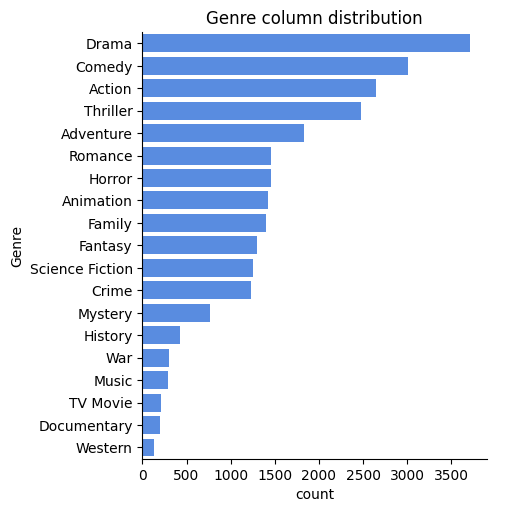

In [36]:
sns.catplot(y ='Genre', data = df, kind = 'count',
            order = df['Genre'].value_counts().index,
            color = '#4287f6')
plt.title('Genre column distribution')
plt.show()


**2. Which has highest vote in vote avg column?**

<function matplotlib.pyplot.show(close=None, block=None)>

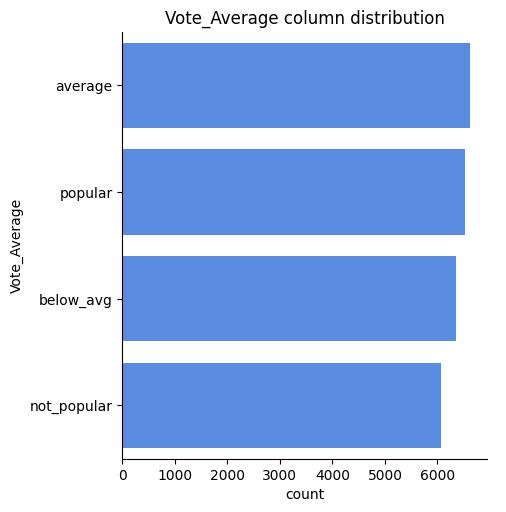

In [37]:
sns.catplot(y ='Vote_Average', data = df, kind = 'count',
            order = df['Vote_Average'].value_counts().index,
            color = '#4287f6')
plt.title('Vote_Average column distribution')
plt.show

**3. Which Movie got highest popularity? what's its genre?**

In [38]:
df[df['Popularity']== df['Popularity'].max()]

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Original_Language,Genre
0,2021,Spider-Man: No Way Home,5083.954,8940,popular,en,Action
1,2021,Spider-Man: No Way Home,5083.954,8940,popular,en,Adventure
2,2021,Spider-Man: No Way Home,5083.954,8940,popular,en,Science Fiction


**4.Which Movie got the lowest popularity?what its genre?**

In [39]:
df[df['Popularity']== df['Popularity'].min()]

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Original_Language,Genre
25546,2021,The United States vs. Billie Holiday,13.354,152,average,en,Music
25547,2021,The United States vs. Billie Holiday,13.354,152,average,en,Drama
25548,2021,The United States vs. Billie Holiday,13.354,152,average,en,History
25549,1984,Threads,13.354,186,popular,en,War
25550,1984,Threads,13.354,186,popular,en,Drama
25551,1984,Threads,13.354,186,popular,en,Science Fiction


**5. Which year has most filmed movies?**

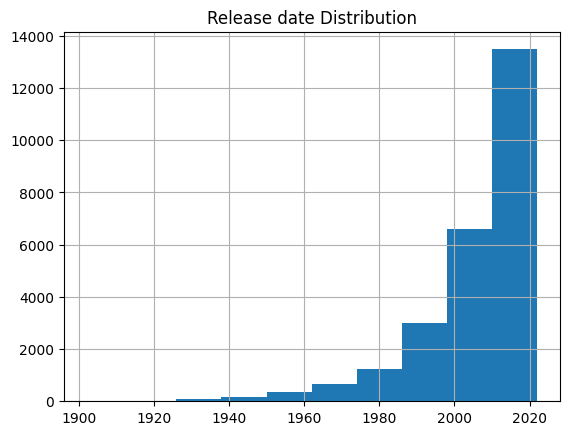

In [40]:
df['Release_Date'].hist()
plt.title('Release date Distribution')
plt.show()

**6.Are there genres that consistently receive higher vote averages than others?**

/tmp/ipython-input-717244454.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  genre_avg = df.groupby('Genre')['Vote_Average_Numeric'].mean().sort_values(ascending=False)


Average vote by Genre:
Genre
Documentary        3.162562
History            3.089202
Music              3.068729
War                3.068404
Animation          2.997896
Western            2.846715
Drama              2.811575
Romance            2.645448
Family             2.629893
Fantasy            2.620849
Crime              2.568421
Adventure          2.547294
TV Movie           2.500000
Mystery            2.462745
Comedy             2.387891
Action             2.373680
Science Fiction    2.334661
Thriller           2.204610
Horror             1.869595
Name: Vote_Average_Numeric, dtype: float64


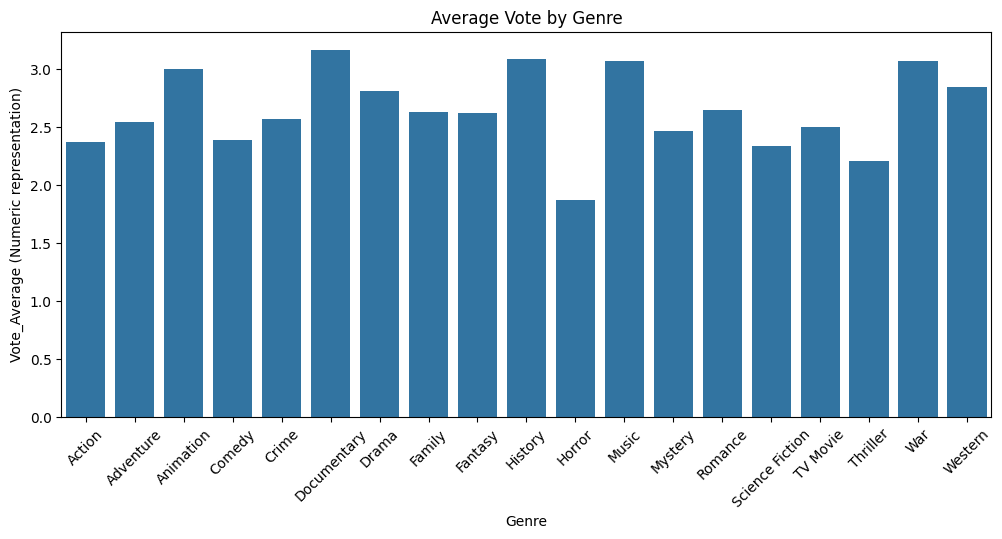

In [48]:
vote_mapping = {'not_popular': 1, 'below_avg': 2, 'average': 3, 'popular': 4}
df['Vote_Average_Numeric'] = df['Vote_Average'].map(vote_mapping).astype(int)

genre_avg = df.groupby('Genre')['Vote_Average_Numeric'].mean().sort_values(ascending=False)
print("Average vote by Genre:")
print(genre_avg)

plt.figure(figsize=(12,5))
sns.barplot(x=genre_avg.index, y=genre_avg.values)
plt.xticks(rotation=45)
plt.title("Average Vote by Genre")
plt.ylabel("Vote_Average (Numeric representation)")
plt.xlabel("Genre")
plt.show()

# Clean up the temporary column
del df['Vote_Average_Numeric']

**`Conclusion`**


Q1.Which is the most frquent genre of movies released on Netflix?
Drama genre is the most frequent genre of movies released on Netflix.

Q2.Which has highest vote in vote avg column?
we have 25.5% of our dataset with popular vote(6520 rows).Drama again gets higest poplarity.

Q3.Which Movie got highest popularity? what's its genre?
Spider man -No way home has got highest popularity and its genre was Action, Adventure and Science fiction.

Q4.Which Movie got the lowest popularity?what its genre?
The United States vs. Billie Holiday got lowest popularity and its genre was Music, Drama and History.

Q5.Which year has most filmed movies?
Year 2020 has most filmed movies on Netflix.

Q6.Are there genres that consistently receive higher vote averages than others?
Documentry genre hav higher vote average than others.